In [2]:
%run "../../../common/0_notebooks_base_setup.py"    

C:\Users\anabella\Documents\DH\Actividades\clase_04\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Checkpoint Estadística Descriptiva

Para esta práctica usaremos un subconjunto de los registros de un dataset de Kaggle que tiene datos oceanográficos https://www.kaggle.com/sohier/calcofi

El conjunto de datos de CalCOFI representa la serie cronológica más larga (desde 1949 hasta el presente) y más completa (más de 50.000 estaciones de muestreo) de datos oceanográficos y de larvas de peces del mundo. 

Incluye datos sobre la abundancia de las larvas de más de 250 especies de peces; datos de frecuencia de tallas de larvas y datos de abundancia de huevos en especies comerciales clave; y datos oceanográficos y de plancton. 

Los datos físicos, químicos y biológicos recopilados a intervalos regulares de tiempo y espacio son valiosos para documentar los ciclos climáticos en la corriente de California y una variedad de respuestas biológicas a esos ciclos. 

La idea de esta práctica es analizar las variables numéricas de este dataset reducido (sólo cinco estaciones de muestreo) calculando medidas de tendencia central, de dispersión, y de asociación entre esas variables.


## Ejercicio 1
Leer los datos del archivo /M1/CLASE_04_EstadisticaDescriptiva/Data/bottle_reducido.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Cada uno del los registros del dataset representa una medición en una estación. Las variables medidas son profundidad, temperatura, saturación de oxígeno, nivel de salinidad.

Las columnas son:

* **Sta_ID**: cadena de caracteres, representa el id de la estación

* **Depth_ID**: cadena de caracteres, representa el id de la medición

* **Depthm**: numérico, representa la profundidad en metros 

* **T_degC**: numérico, representa la temperatura en grados centigrados

* **O2Sat**: numérico, representa la saturación de oxígeno

* **Salnty**: numérico, representa el nivel de salinidad

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [3]:
import numpy as np

data_location = '../Data/bottle_reducido.csv'

In [4]:
data = np.genfromtxt(data_location, skip_header=1, delimiter="\t", dtype=str)
data # Si instanciamos el array con tipo de dato int o float, perderíamos información.

array([['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0000B-3', '0',
        '10.3', '92.8', '33.03'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0006A-3', '6',
        '18.46', '111.8', '32.92'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0010A-7', '10',
        '10.29', '95.0', '32.951'],
       ...,
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1100A-7', '1100',
        '3.51', '6.4', '34.44'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1200A-7', '1200',
        '3.29', '7.3', '34.481'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1247A-3', '1247',
        '3.18', '7.6', '34.5']], dtype='<U38')

## Ejercicio 2

Sobre los datos de nivel de salinidad (columna Salnty) calcular:

* media

* mediana 

* desvio

* rango


In [18]:
salinity = data[:, 5].astype(np.float)
mean_salinity = np.mean(salinity).round(2)
mean_salinity

33.6

In [19]:
median_salinity = np.median(salinity).round(2)
median_salinity

33.85

In [20]:
std_salinity = np.std(salinity).round(2)
std_salinity

0.66

In [8]:
maximum = np.max(salinity)
minimum = np.min(salinity)
range_salinity = maximum - minimum
range_salinity.round(2)

2.36

## Ejercicio 3

Usando la función `distribution_plotter` graficar las distribuciones de las variables Depthm, T_degC, O2Sat, Salnty

<code>

import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
</code>


Qué pueden decir de estas distribuciones?

Pongan atención en la elección del parámetro `bin_width` para que el gráfico sea informativo.


In [9]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [10]:
# Depth
depth = data[:,2].astype(np.float)
temperature = data[:,3].astype(np.float)
oxygen_saturation = data[:, 4].astype(np.float)

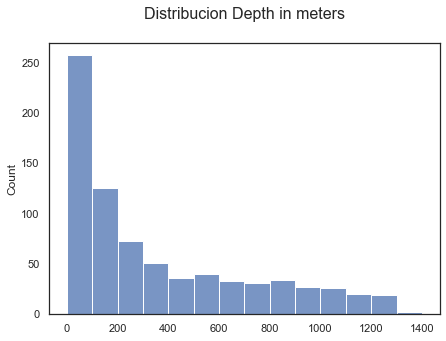

In [11]:
distribution_plotter(depth, "Depth in meters", 100)

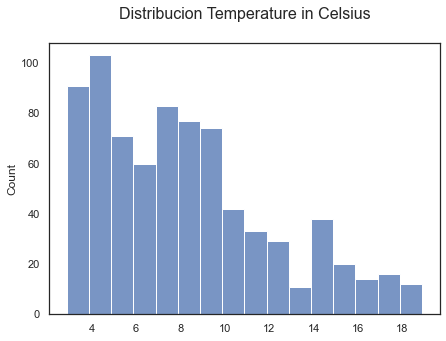

In [23]:
distribution_plotter(temperature, "Temperature in Celsius", 1)

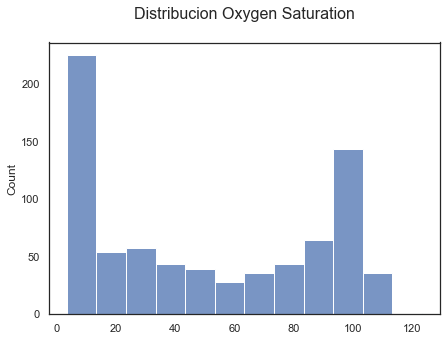

In [24]:
distribution_plotter(oxygen_saturation, "Oxygen Saturation", 10)

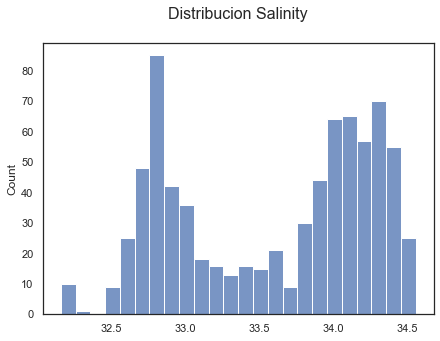

In [26]:
distribution_plotter(salinity, "Salinity", 0.1)

## Ejercicio 4

Calcular las matrices de correlación y covarianza de las variables Depthm, T_degC, O2Sat, Salnty

A partir de estos resultados, elegir sólo una de estas variables para intentar predecir el valor de salinidad:

* ¿Usarían para esto la matriz de correlación o la de covarianzas? ¿Por qué?

* ¿Qué variable elegirían? Justificar la decisión.



In [15]:
#depth
#temperature
#oxygen_saturation
#salinity

In [16]:
np.cov([depth, temperature, oxygen_saturation, salinity])

array([[ 1.22730122e+05, -1.11538543e+03, -1.10802454e+04,
         1.92117557e+02],
       [-1.11538543e+03,  1.54435978e+01,  1.32676236e+02,
        -2.36152167e+00],
       [-1.10802454e+04,  1.32676236e+02,  1.42106646e+03,
        -2.40228614e+01],
       [ 1.92117557e+02, -2.36152167e+00, -2.40228614e+01,
         4.31176278e-01]])

In [17]:
np.corrcoef([depth, temperature, oxygen_saturation, salinity])

array([[ 1.        , -0.81016811, -0.83900896,  0.83514915],
       [-0.81016811,  1.        ,  0.8955951 , -0.91514575],
       [-0.83900896,  0.8955951 ,  1.        , -0.97048787],
       [ 0.83514915, -0.91514575, -0.97048787,  1.        ]])

In [ ]:
# Para intentar predecir el valor de salinidad usamos la medida de correlación ya que compara las variables independientemente
# de sus unidades y de su escala de medida.
# Elegimos la variable de Saturación de Oxígeno ya que en la matriz de correlaciones, es aquella que presenta mayor valor absoluto
# con respecto a la variable de Salinidad.